In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [3]:
df.shape

(7752, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin   Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2  30.0   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5  30.0   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9  30.0   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3  30.0   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5  30.0   

   Month    Year  
0    6.0  2013.0  
1    6.0  2013.0  
2    6.0  2013.0  
3    6.0  2013.0  
4    6.0  2013.0  

[5 rows x 28 columns]

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

In [9]:
df.drop('Date',axis=1,inplace=True)

In [10]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat         lon          DEM        Slope  \
count  7588.000000  ...  7588.000000  7588.00000  7588.000000  7588.000000   
mean      0.368510  ...    37.544792   126.99142    61.918136     1.259755   
std       0.262260  ...     0.050428     0.07922    54.323529     1.372748   
min       0.000000  ...    37.456200   126.82600    12.370000     0.098500   
25%       0.146546  ...    37.510200   126.93700    28.700000     0.271300   
50%       0.315706  ...    37.550700   126.99500    45.716000     0.618000   
75%       0.574174  ...    37.577600   127.04200    59.832400     1.767800   
max       0.967277  ...    37.645000   127.13500   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean       5343.724208    30.241526    22.910820    16.337375     7.068134   
std         429.782561     3.111807     2.482256     8.216880     2.242389   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        5001.485717    28.200000    21.300000     8.000000     7.000000   
50%        5441.987305    30.400000    23.100000    16.000000     7.000000   
75%        5729.485840    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              Year  
count  7588.000000  
mean   2014.991697  
std       1.410877  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

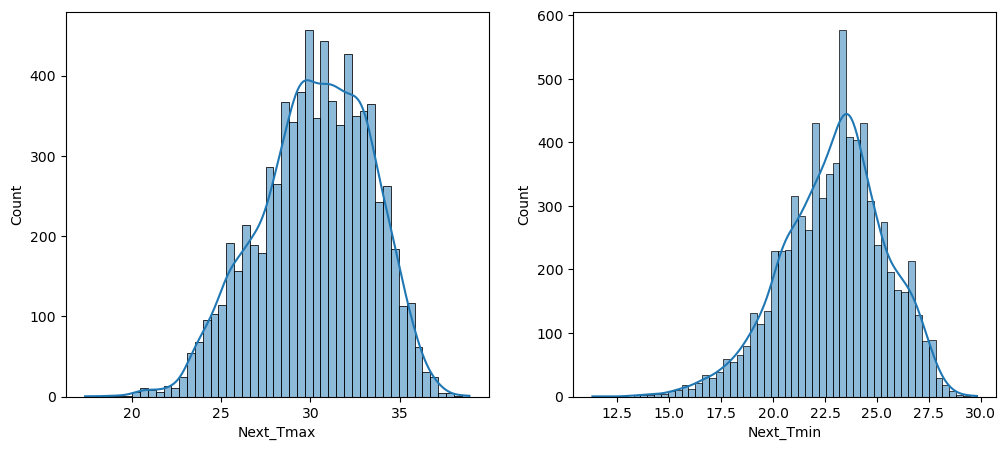

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True)
plt.show()

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

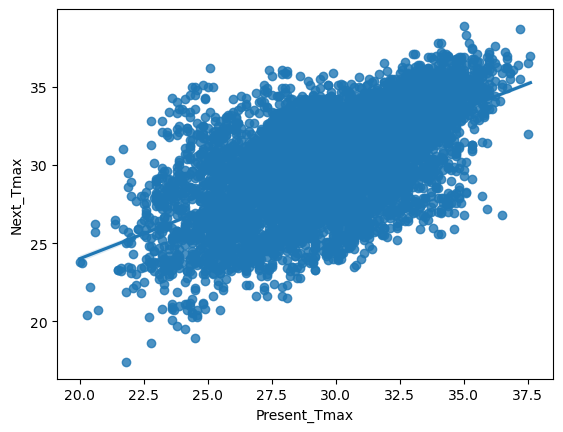

In [14]:
sns.regplot(x='Present_Tmax',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmin'>

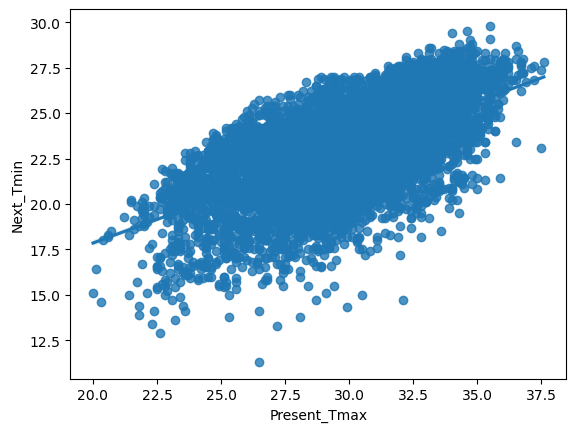

In [15]:
sns.regplot(x='Present_Tmax',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmax'>

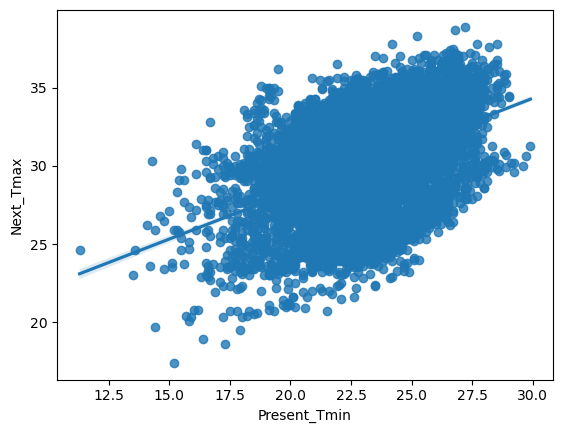

In [16]:
sns.regplot(x='Present_Tmin',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

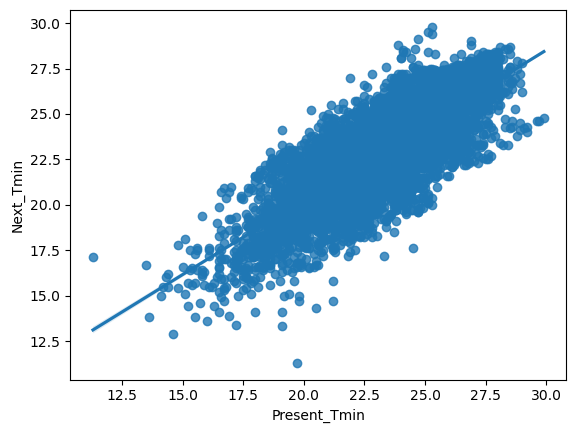

In [17]:
sns.regplot(x='Present_Tmin',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmax'>

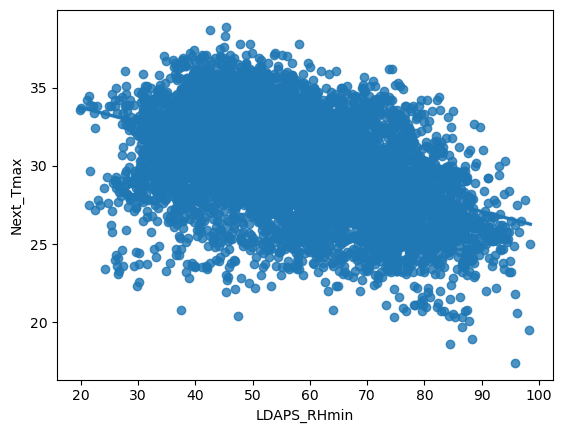

In [18]:
sns.regplot(x='LDAPS_RHmin',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

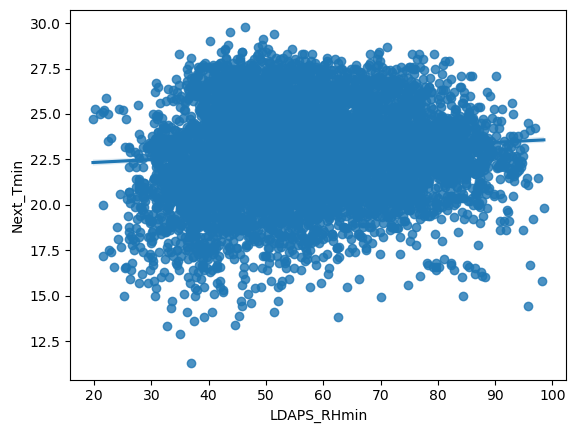

In [19]:
sns.regplot(x='LDAPS_RHmin',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmax'>

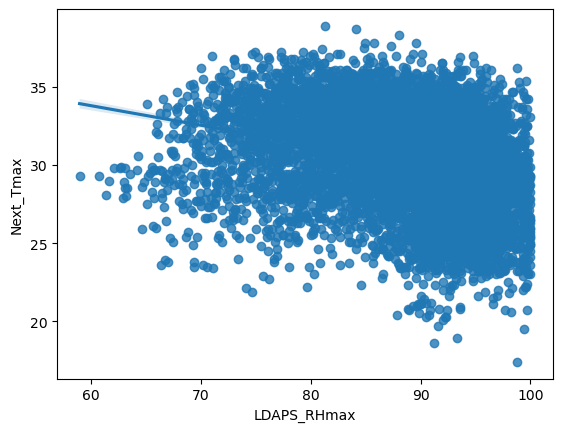

In [20]:
sns.regplot(x='LDAPS_RHmax',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmin'>

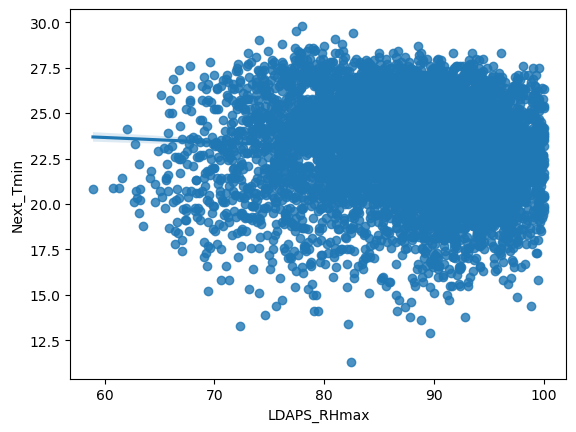

In [21]:
sns.regplot(x='LDAPS_RHmax',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

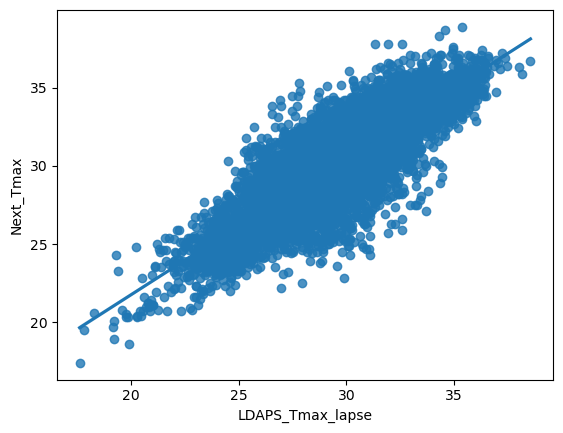

In [22]:
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmin'>

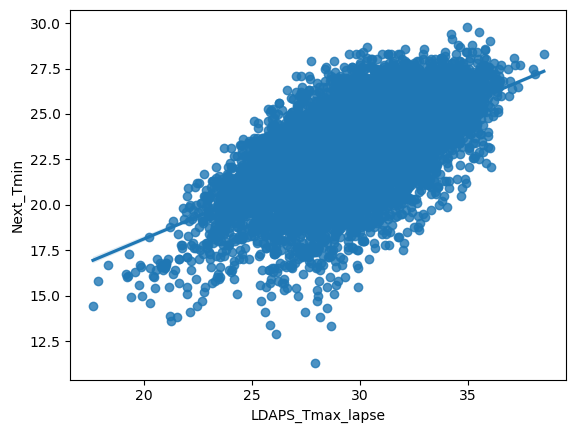

In [24]:
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmax'>

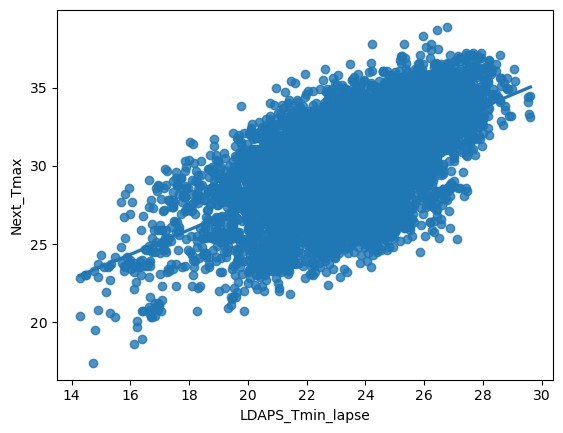

In [25]:
sns.regplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

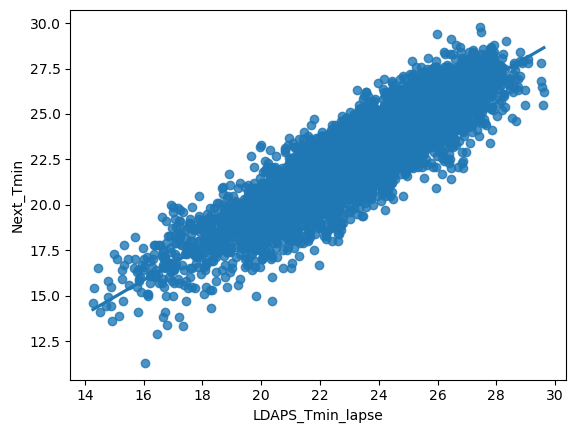

In [26]:
sns.regplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmax'>

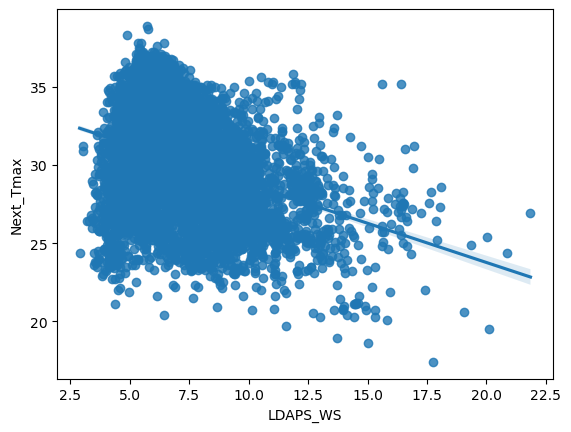

In [27]:
sns.regplot(x='LDAPS_WS',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmin'>

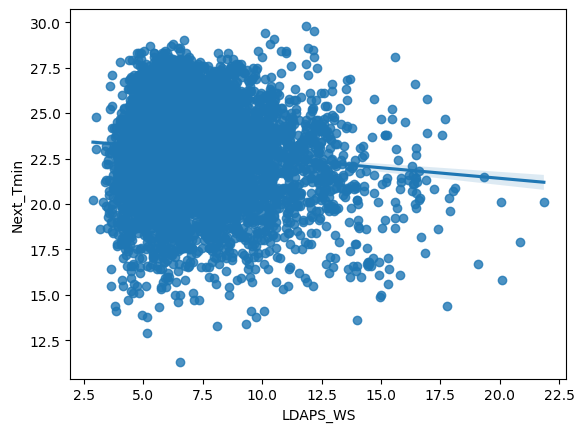

In [28]:
sns.regplot(x='LDAPS_WS',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmax'>

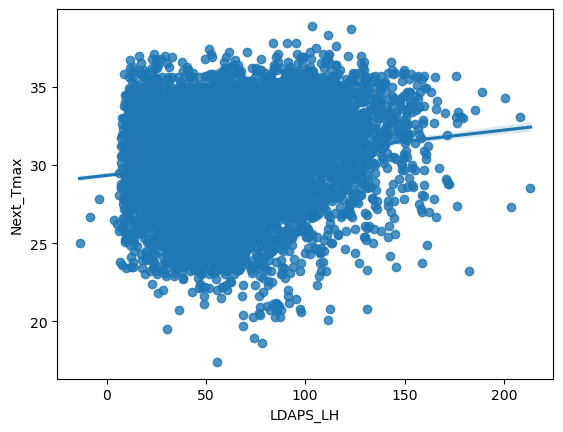

In [29]:
sns.regplot(x='LDAPS_LH',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

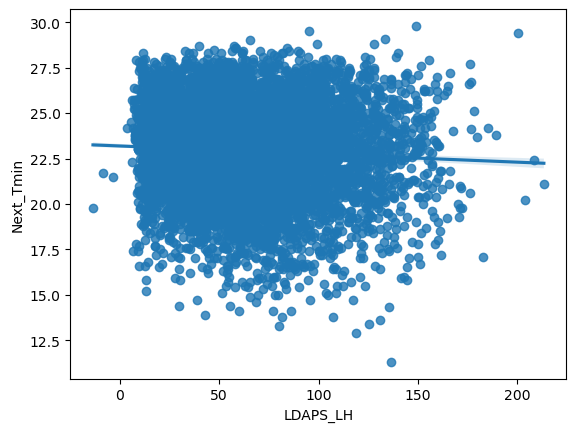

In [30]:
sns.regplot(x='LDAPS_LH',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

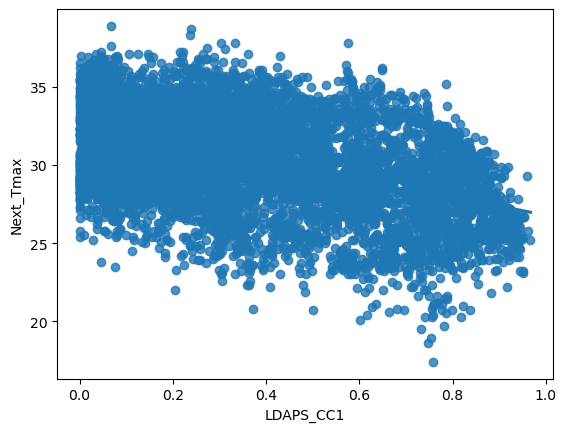

In [31]:
sns.regplot(x='LDAPS_CC1',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmin'>

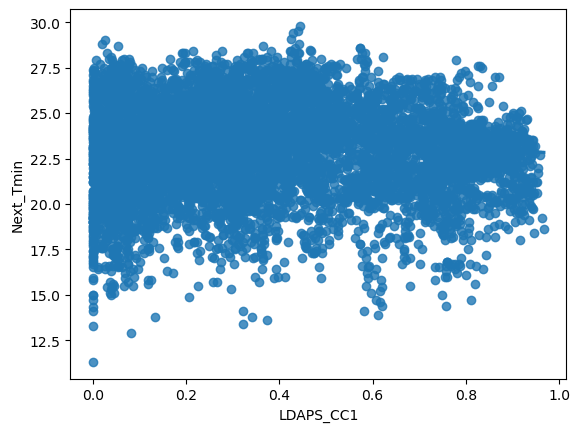

In [32]:
sns.regplot(x='LDAPS_CC1',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmax'>

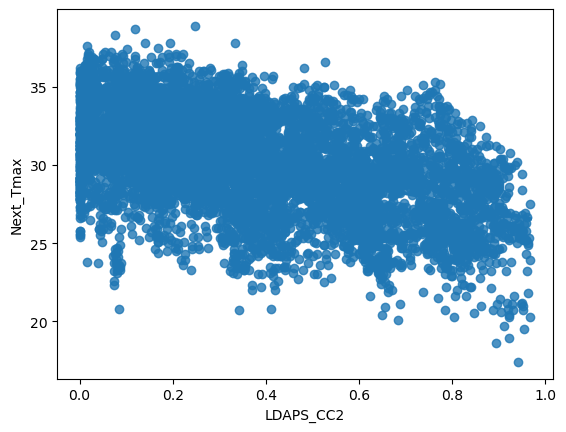

In [33]:
sns.regplot(x='LDAPS_CC2',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmin'>

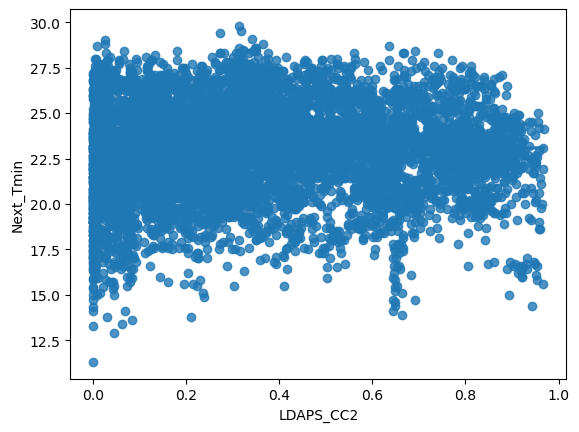

In [34]:
sns.regplot(x='LDAPS_CC2',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmax'>

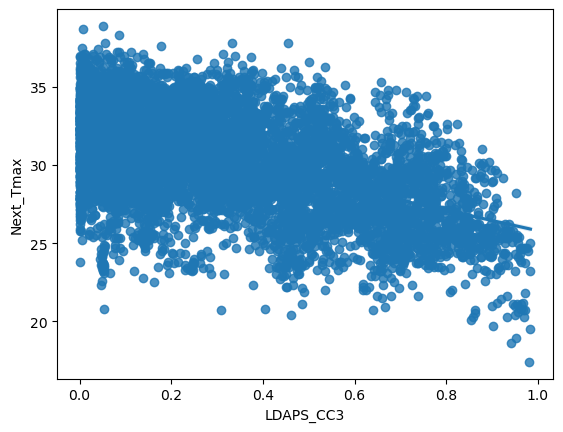

In [35]:
sns.regplot(x='LDAPS_CC3',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

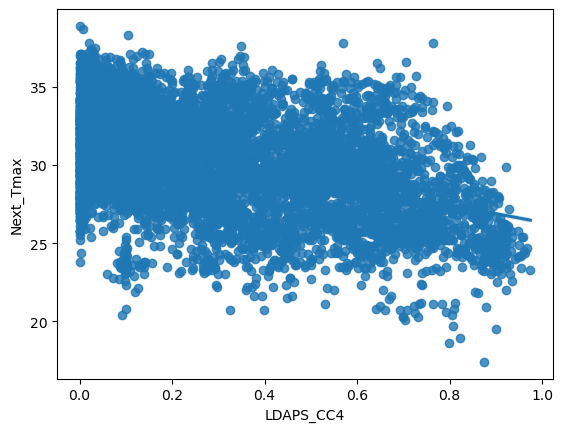

In [36]:
sns.regplot(x='LDAPS_CC4',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmin'>

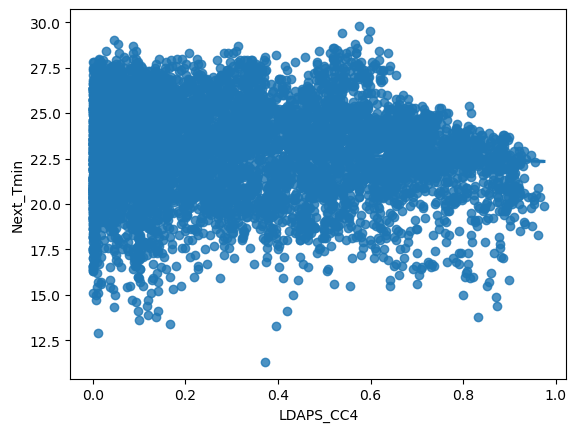

In [37]:
sns.regplot(x='LDAPS_CC4',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmax'>

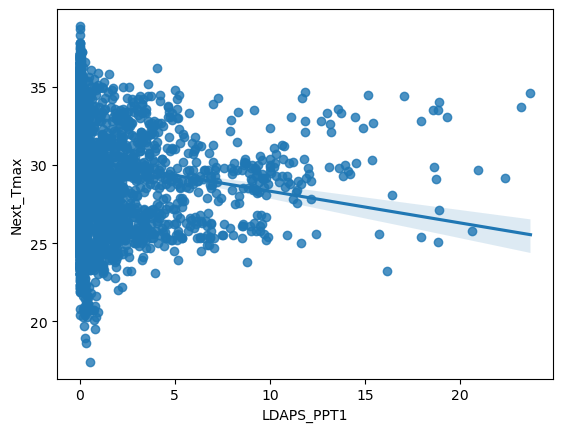

In [38]:
sns.regplot(x='LDAPS_PPT1',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmin'>

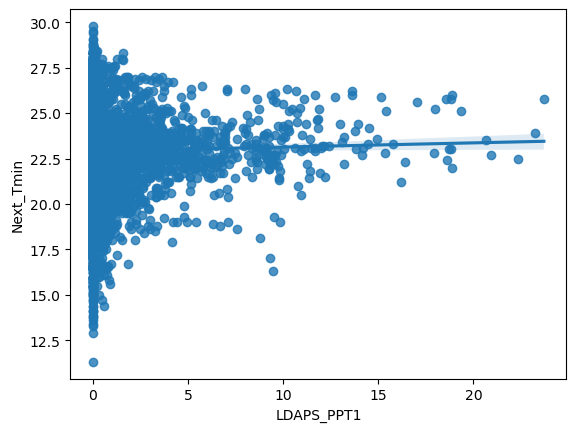

In [39]:
sns.regplot(x='LDAPS_PPT1',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmax'>

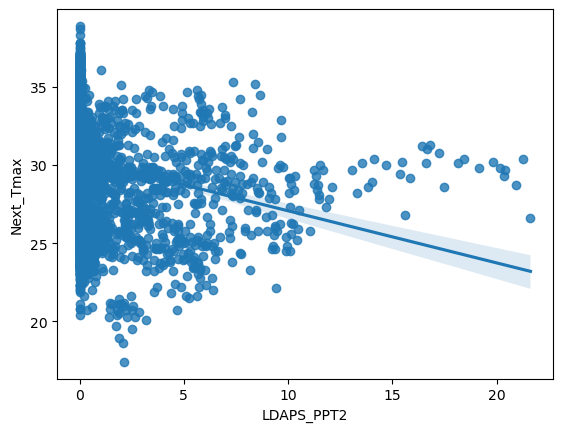

In [40]:
sns.regplot(x='LDAPS_PPT2',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmin'>

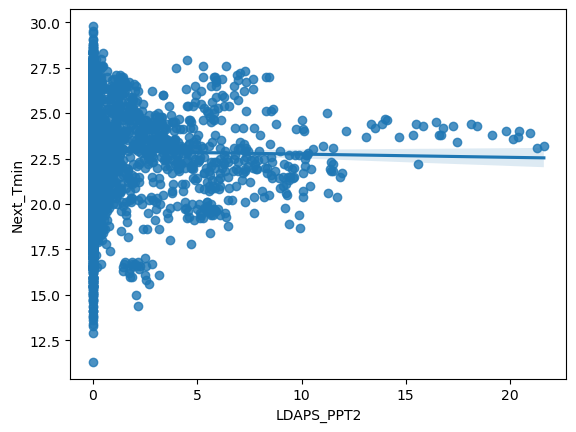

In [41]:
sns.regplot(x='LDAPS_PPT2',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmax'>

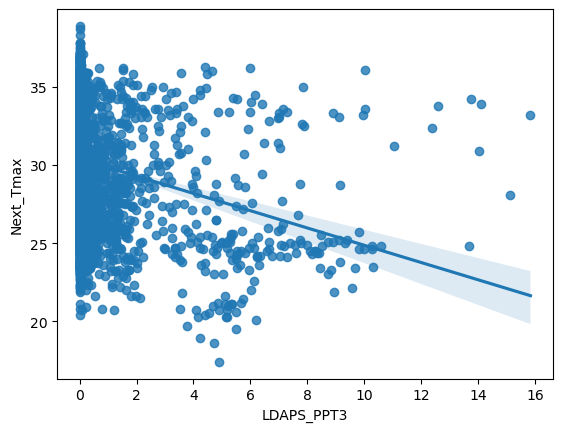

In [42]:
sns.regplot(x='LDAPS_PPT3',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmin'>

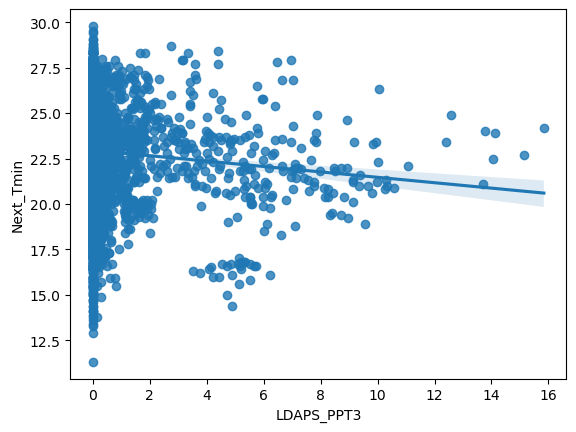

In [43]:
sns.regplot(x='LDAPS_PPT3',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmax'>

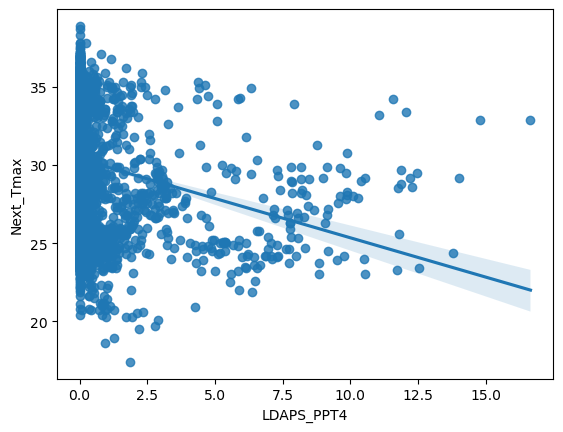

In [44]:
sns.regplot(x='LDAPS_PPT4',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmin'>

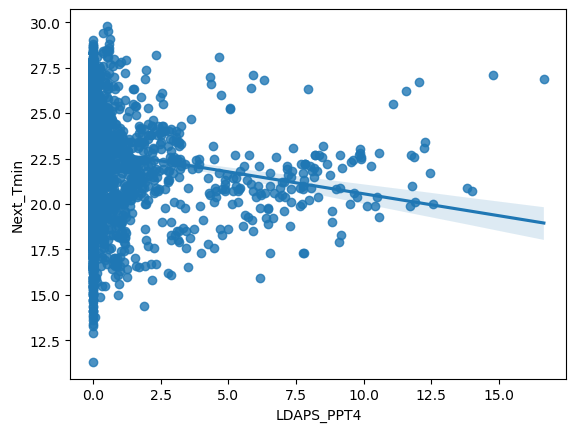

In [45]:
sns.regplot(x='LDAPS_PPT4',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='lat', ylabel='Next_Tmax'>

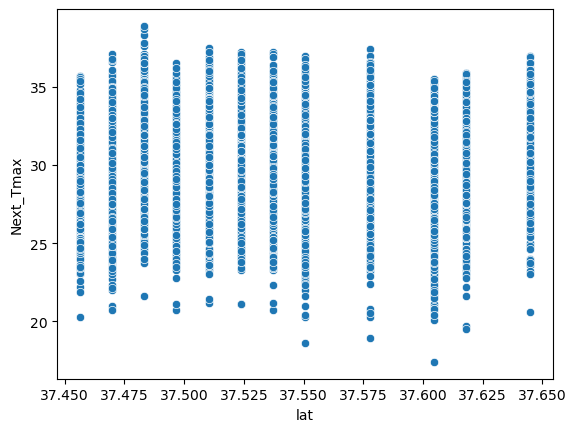

In [52]:
sns.scatterplot(x='lat',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='lat', ylabel='Next_Tmin'>

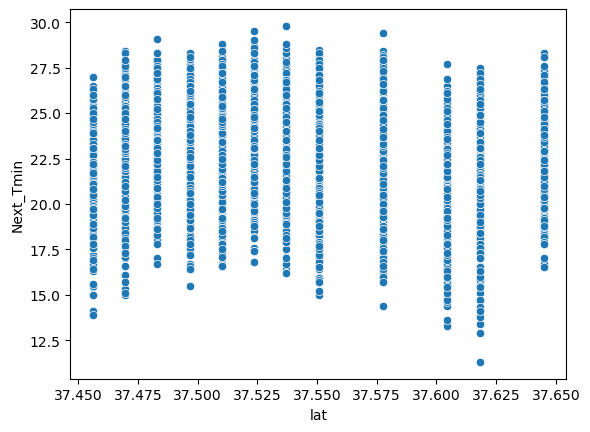

In [53]:
sns.scatterplot(x='lat',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='lon', ylabel='Next_Tmax'>

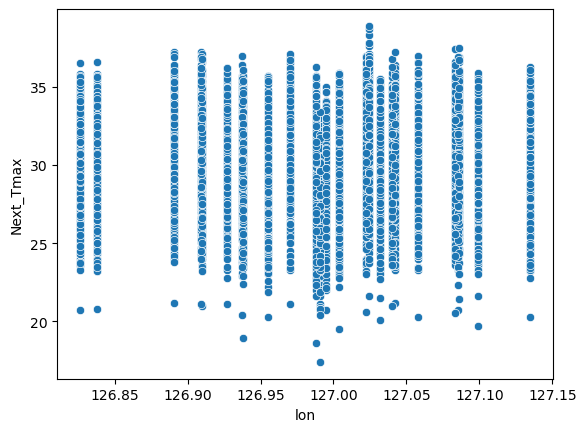

In [54]:
sns.scatterplot(x='lon',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='lon', ylabel='Next_Tmin'>

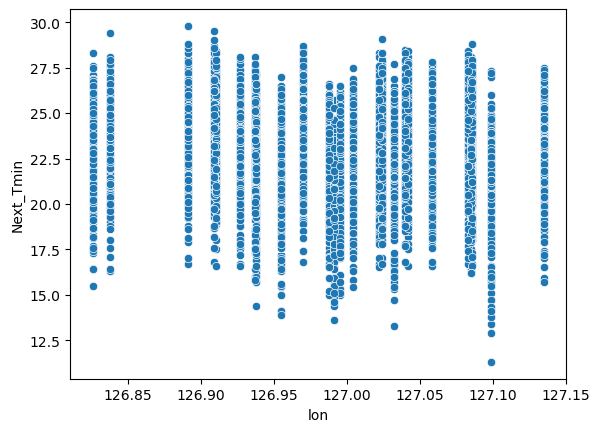

In [55]:
sns.scatterplot(x='lon',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='DEM', ylabel='Next_Tmax'>

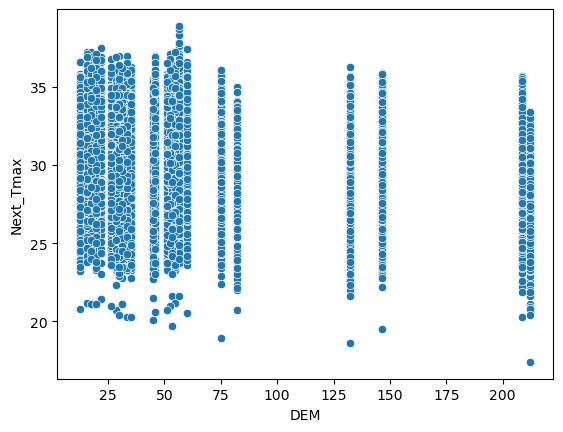

In [56]:
sns.scatterplot(x='DEM',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='DEM', ylabel='Next_Tmin'>

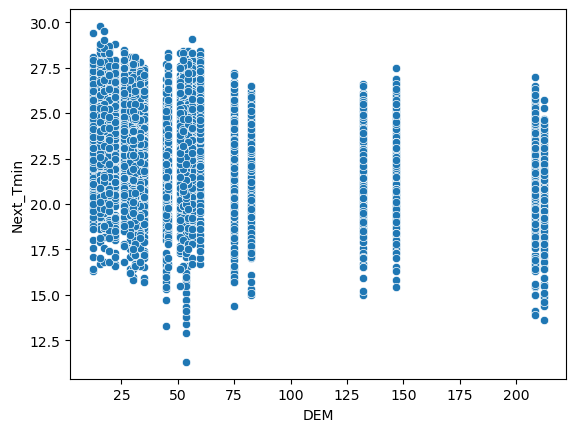

In [57]:
sns.scatterplot(x='DEM',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmax'>

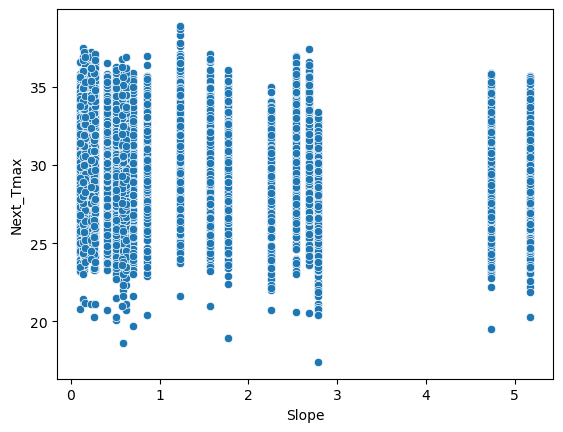

In [58]:
sns.scatterplot(x='Slope',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmin'>

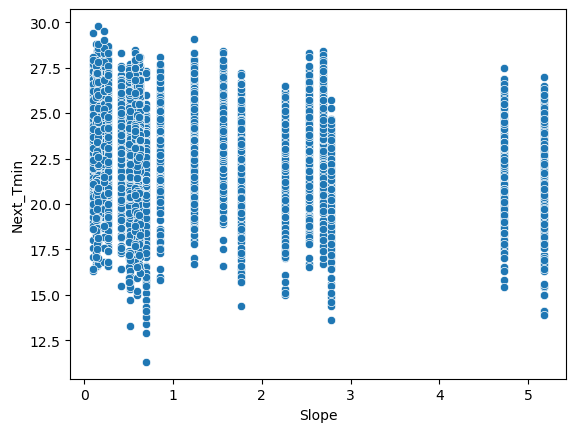

In [59]:
sns.scatterplot(x='Slope',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmax'>

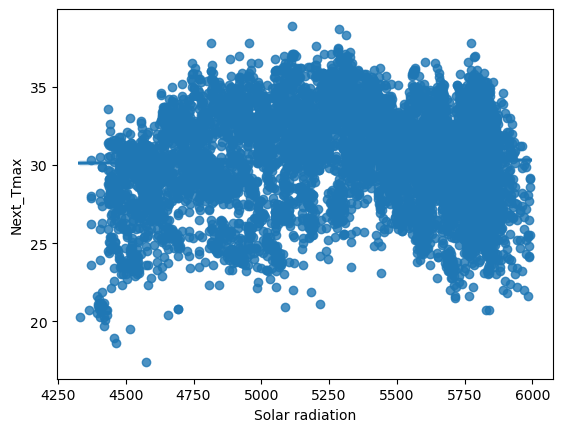

In [61]:
sns.regplot(x='Solar radiation',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

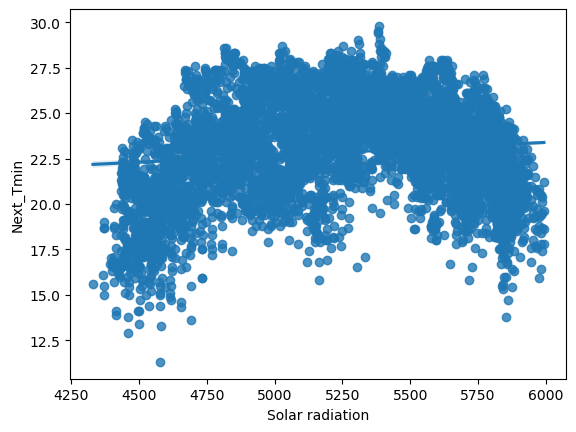

In [62]:
sns.regplot(x='Solar radiation',y='Next_Tmin',data=df)

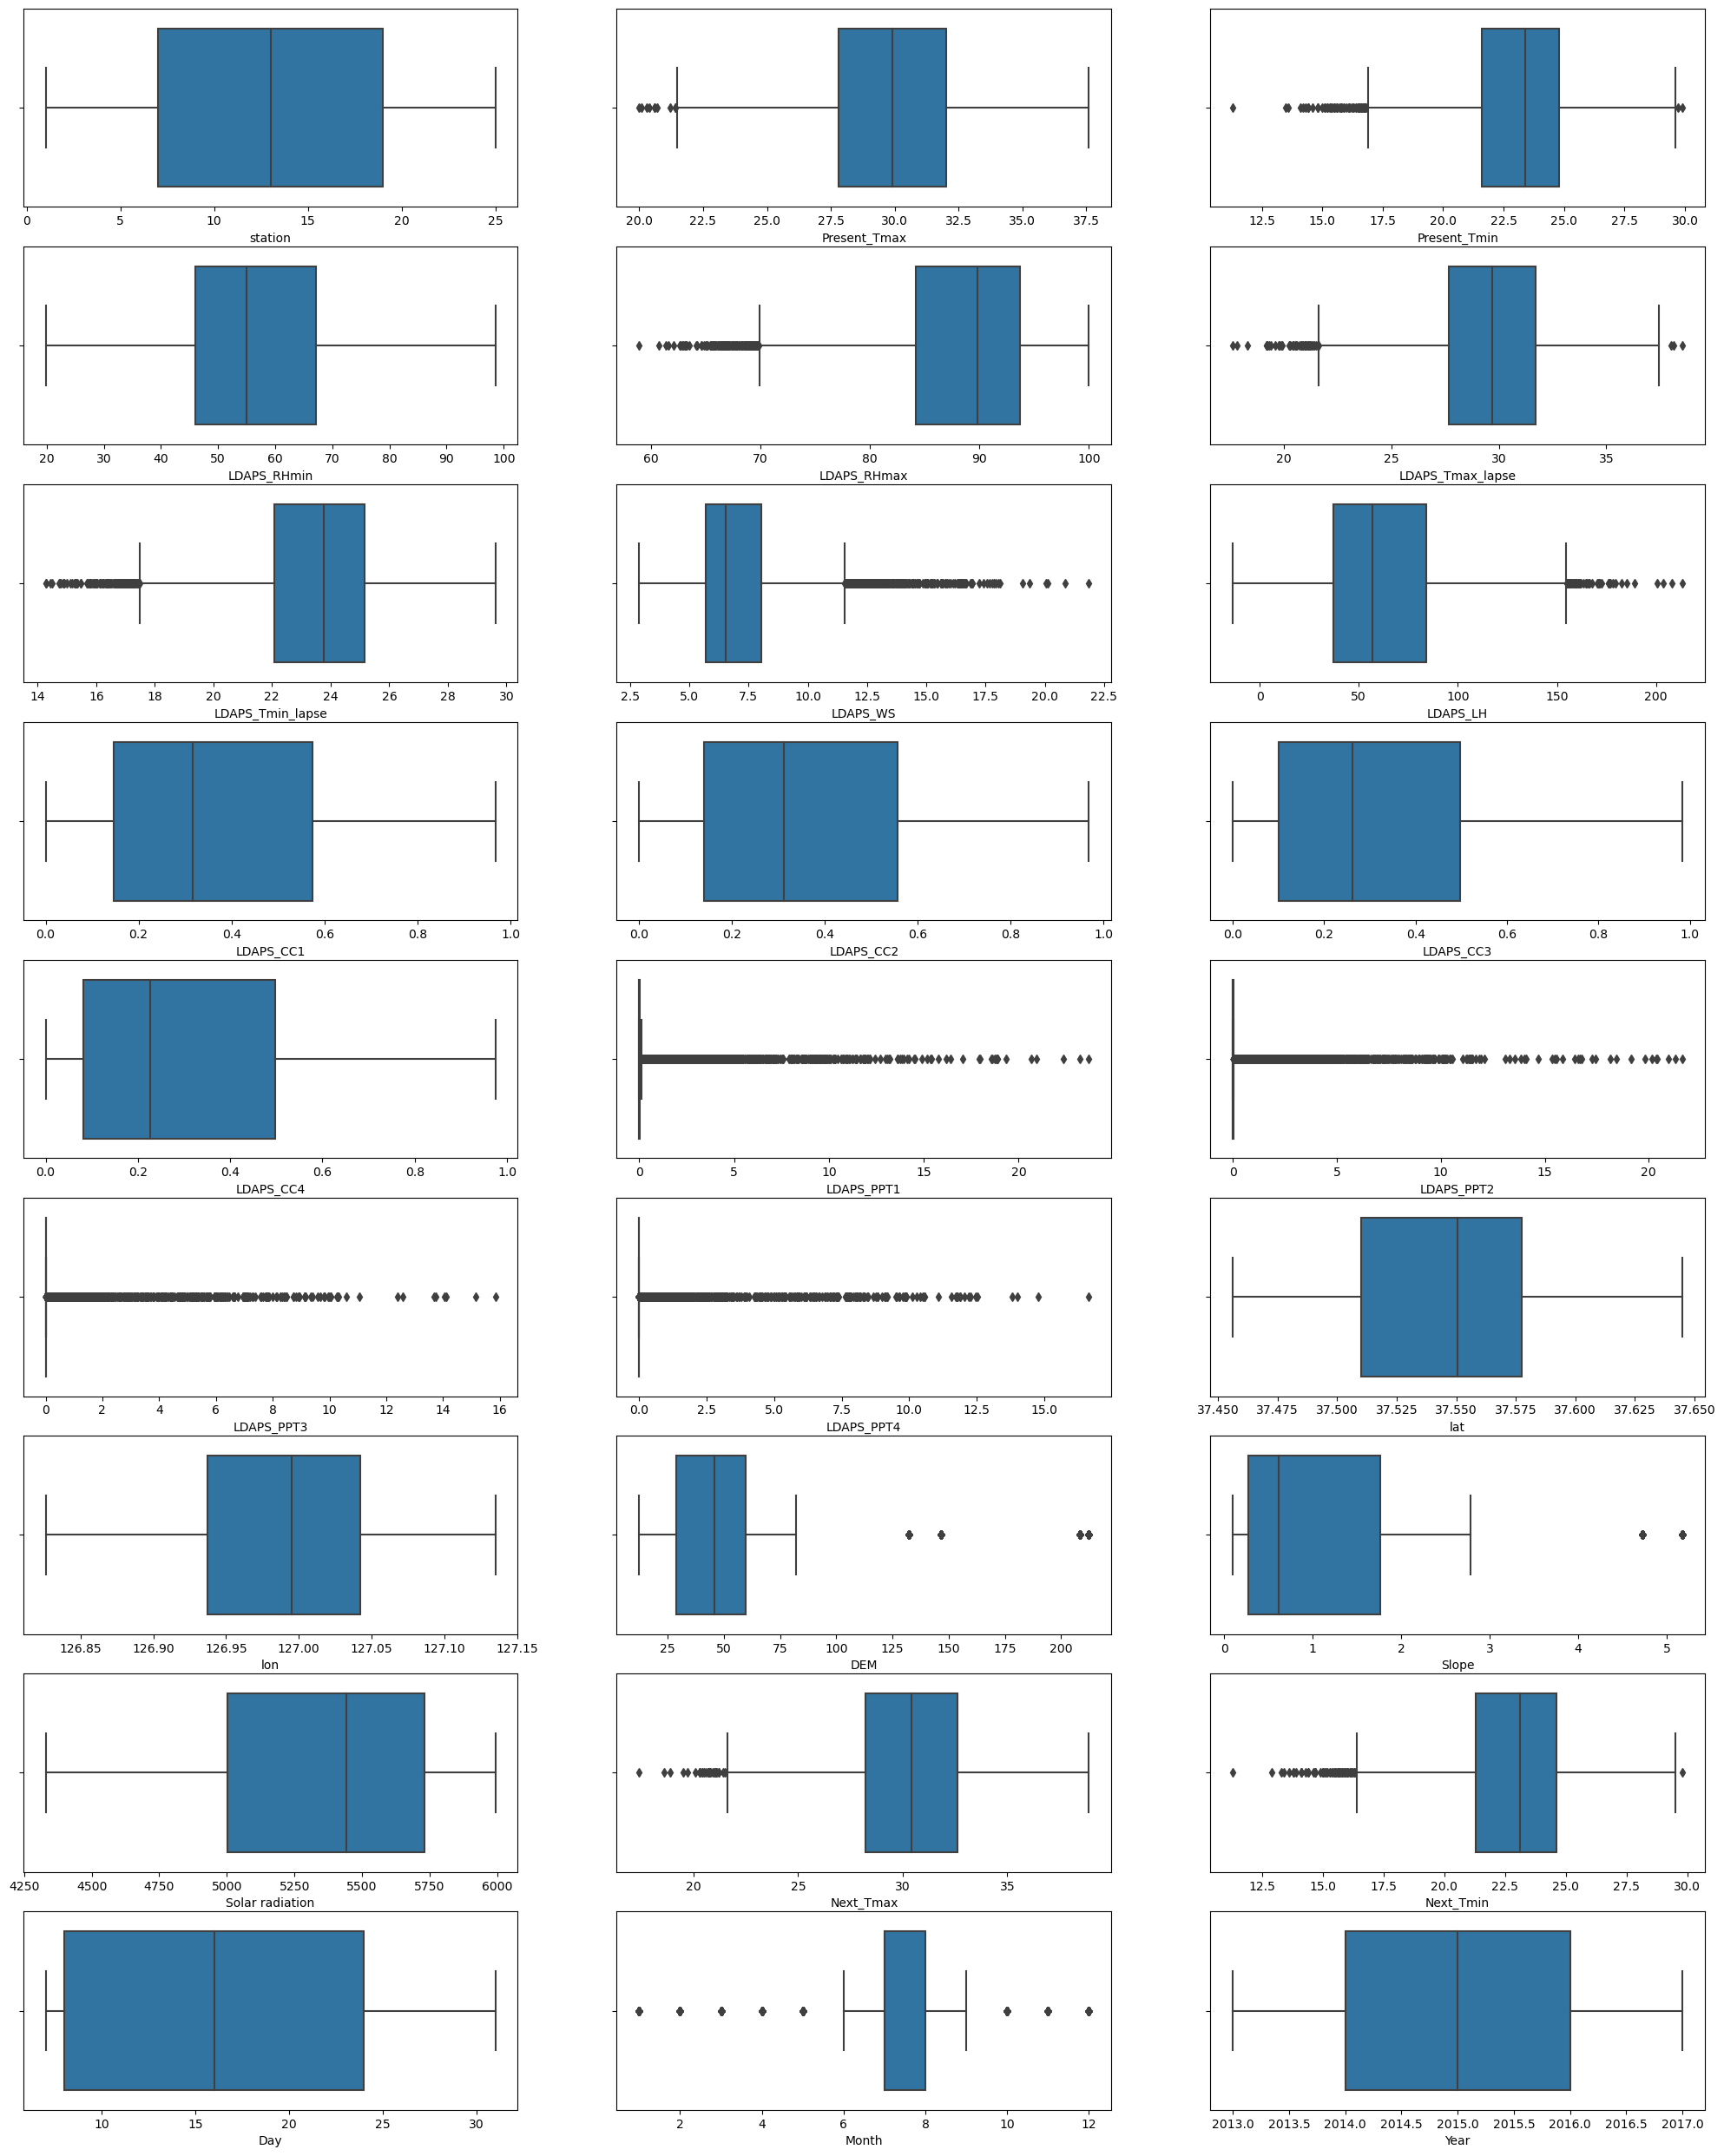

In [72]:
plt.figure(figsize=(25,35))
p=1
for i in df:
    if p<=30:
        plt.subplot(10,3,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
        
    p+=1
plt.show()

In [73]:
from scipy.stats import zscore
out_feature = df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Month']]
z = np.abs(zscore(out_feature))
z

Present_Tmax  Present_Tmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0         0.353318      0.748029     0.382768          0.525269   
1         0.725138      0.664721     0.311697          0.078334   
2         0.624033      0.043400     0.609425          0.160080   
3         0.758840      0.085054     1.128335          0.028710   
4         0.556630      0.539758     0.249244          0.171981   
...            ...           ...          ...               ...   
7745      2.240616      2.247578     1.402898          0.614083   
7746      2.442826      2.414195     0.648815          0.990460   
7747      2.173212      2.539157     1.318376          1.110333   
7748      2.173212      2.289232     1.537141          0.886737   
7749      2.206914      2.414195     1.544257          0.570995   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_PPT1  LDAPS_PPT2  \
0             0.215525  0.126423  0.206603    0.305589    0.275777   
1             0.223368  0.644133  0.313359    0.305589    0.275777   
2             0.449896  0.439100  1.244497    0.305589    0.275777   
3             0.079238  0.663353  0.096026    0.305589    0.275777   
4             0.010803  0.624327  1.349989    0.305589    0.275777   
...                ...       ...       ...         ...         ...   
7745          2.223667  0.225479  1.569844    0.305589    0.275777   
7746          2.432415  0.609132  0.583486    0.305589    0.275777   
7747          2.021883  0.434188  0.283984    0.305589    0.275777   
7748          2.039881  0.253241  0.452772    0.305589    0.275777   
7749          2.129768  0.089654  1.585402    0.305589    0.275777   

      LDAPS_PPT3  LDAPS_PPT4       DEM     Slope     Month  
0       0.239969    0.224971  2.769091  1.111162  0.476369  
1       0.239969    0.224971  0.315828  0.543220  0.476369  
2       0.239969    0.224971  0.526719  0.723891  0.476369  
3       0.239969    0.224971  0.298272  0.928888  0.476369  
4       0.239969    0.224971  0.494848  0.549485  0.476369  
...          ...         ...       ...       ...       ...  
7745    0.239969    0.224971  0.655747  0.500966  0.415596  
7746    0.239969    0.224971  0.735482  0.820711  0.415596  
7747    0.239969    0.224971  0.852919  0.804538  0.415596  
7748    0.239969    0.224971  0.821476  0.755800  0.415596  
7749    0.239969    0.224971  0.779341  0.720103  0.415596  

[7588 rows x 14 columns]

In [74]:
np.where(z>3)

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64),
 array([5, 8, 8, ..., 1, 1, 4], dtype=int64))

In [75]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(6752, 27)

In [76]:
df1

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      ...      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0     ...  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1     ...  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2     ...  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3     ...  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4     ...  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   
...   ...      ...      ...       ...     ...              ...        ...   
7745  ...  37.5507  127.040   26.2980  0.5721      4456.024414       27.6   
7746  ...  37.5102  127.086   21.9668  0.1332      4441.803711       28.0   
7747  ...  37.5372  126.891   15.5876  0.1554      4443.313965       28.3   
7748  ...  37.5237  126.909   17.2956  0.2223      4438.373535       28.6   
7749  ...  37.5237  126.970   19.5844  0.2713      4451.345215       27.8   

      Next_Tmin   Day  Month    Year  
0          21.2  30.0    6.0  2013.0  
1          22.5  30.0    6.0  2013.0  
2          23.9  30.0    6.0  2013.0  
3          24.3  30.0    6.0  2013.0  
4          22.5  30.0    6.0  2013.0  
...         ...   ...    ...     ...  
7745       17.7  30.0    8.0  2017.0  
7746       17.1  30.0    8.0  2017.0  
7747       18.1  30.0    8.0  2017.0  
7748       18.8  30.0    8.0  2017.0  
7749       17.4  30.0    8.0  2017.0  

[6752 rows x 27 columns]

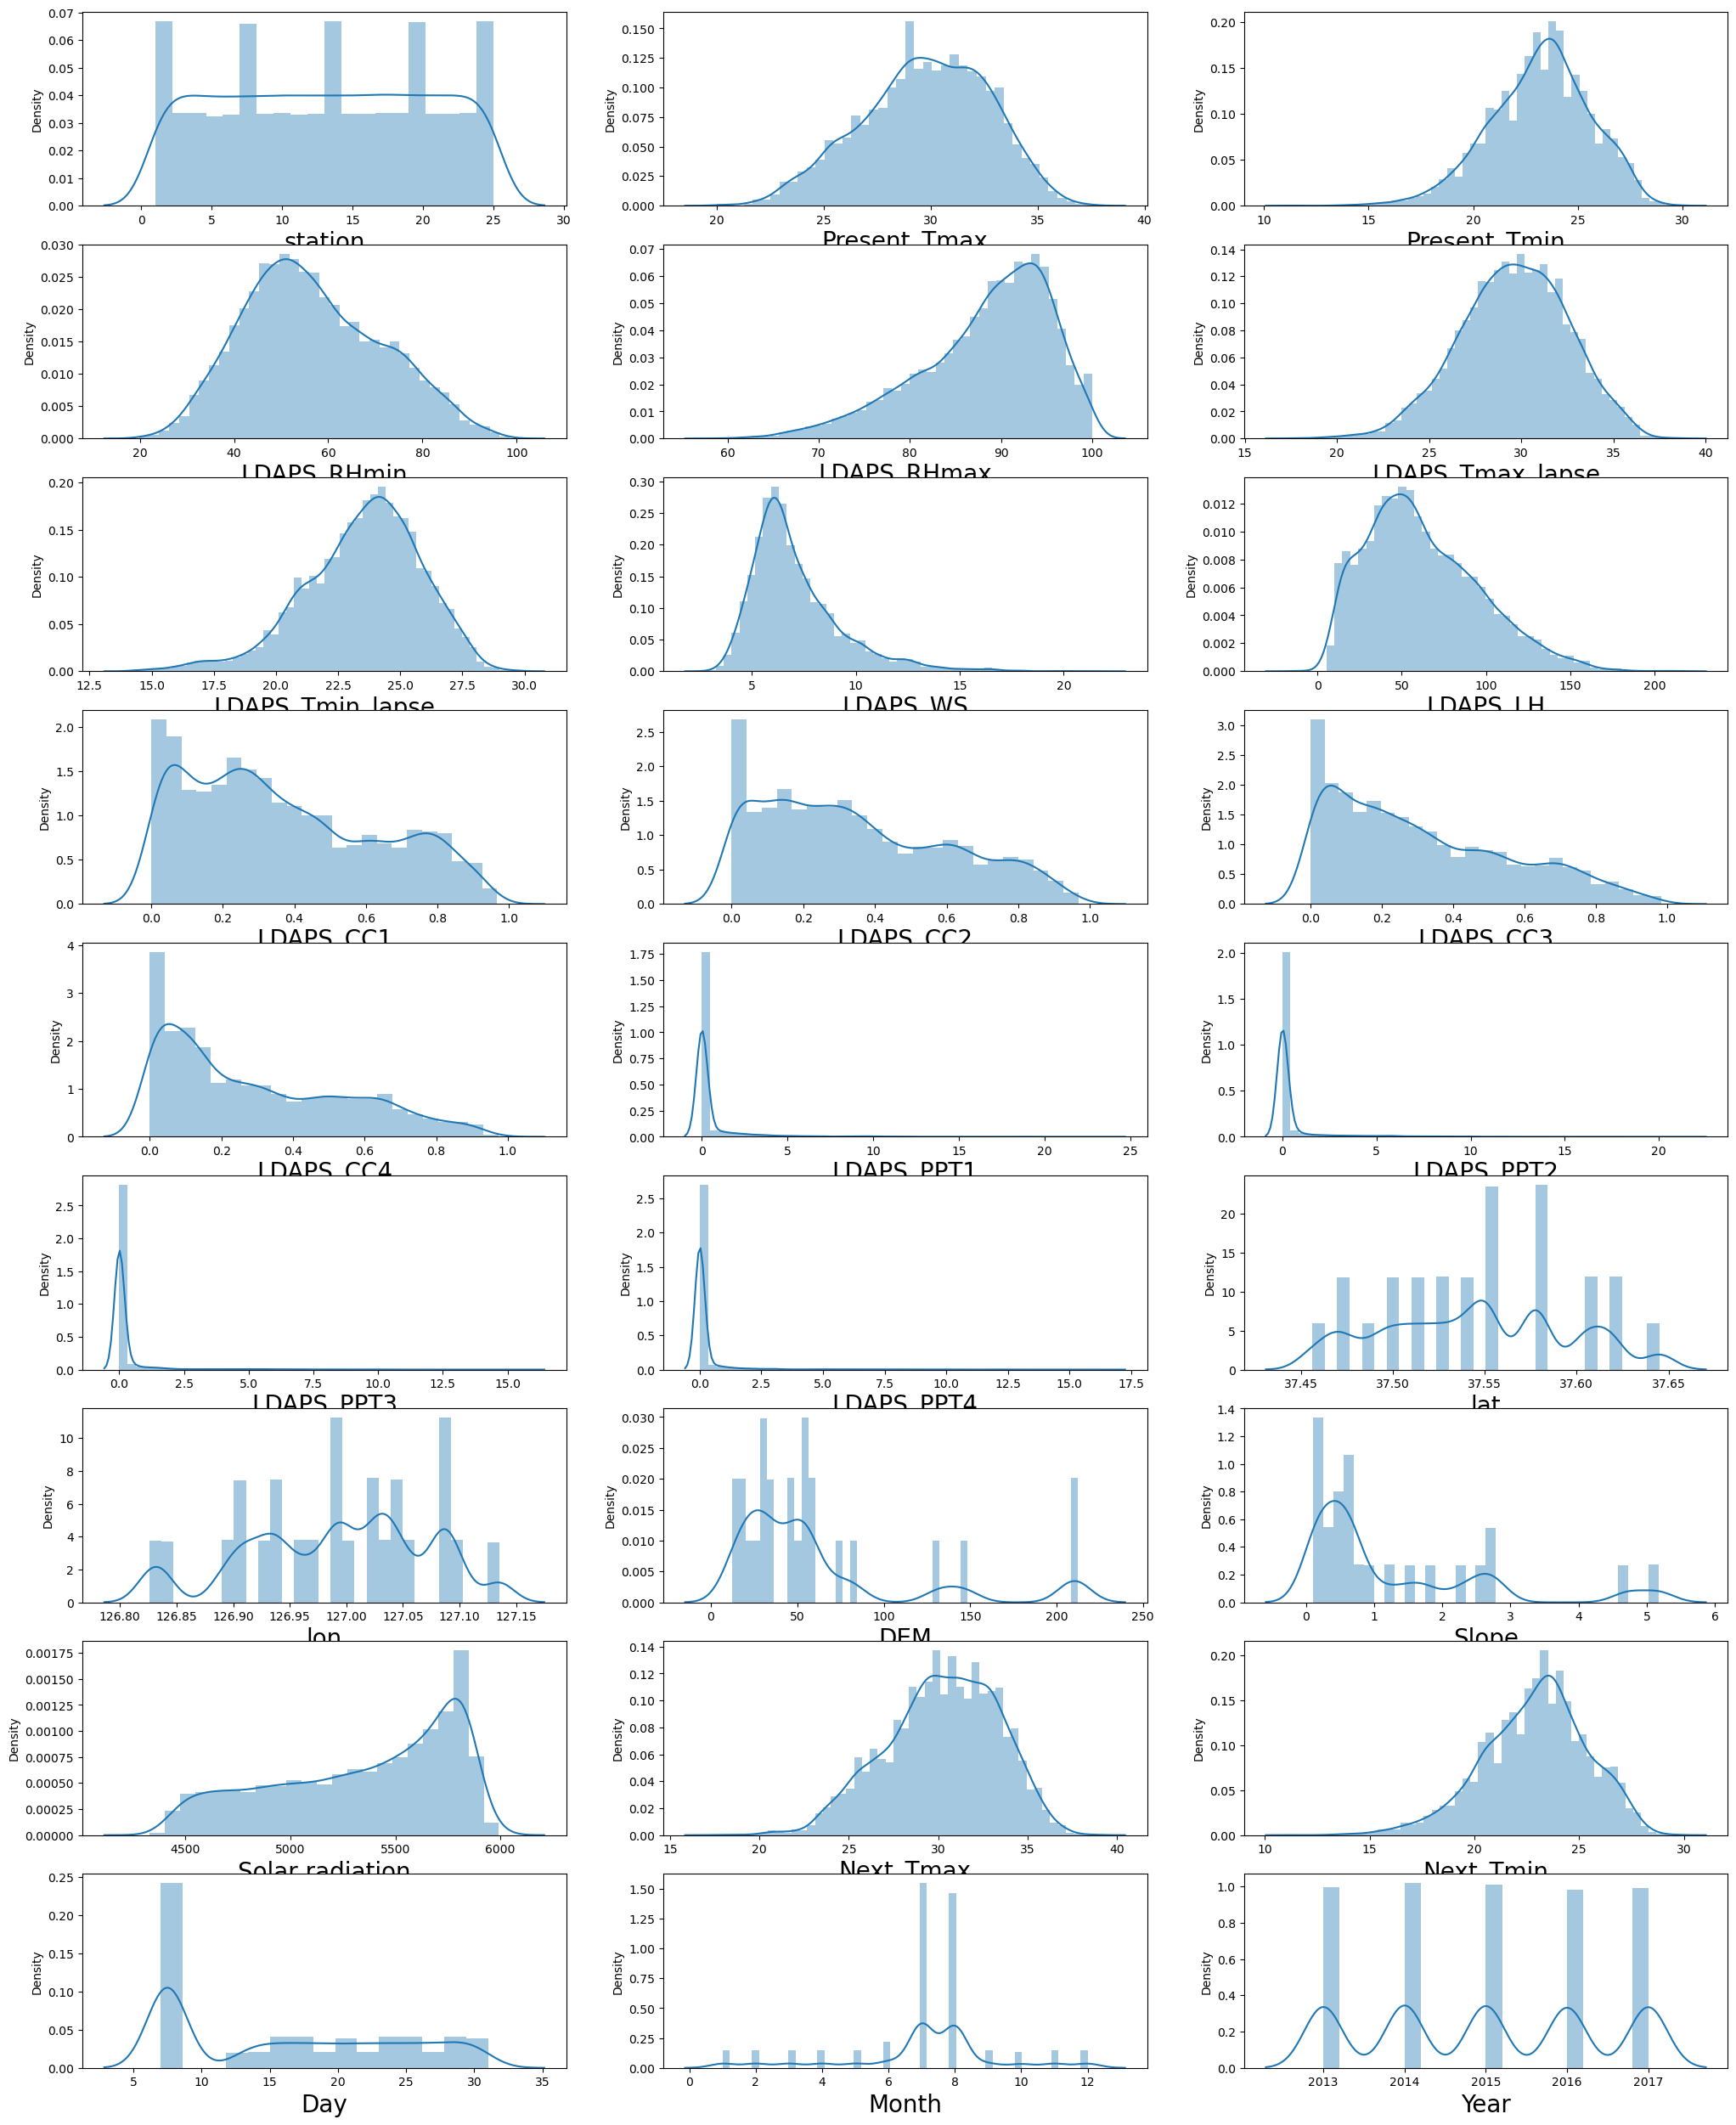

In [77]:
plt.figure(figsize=(25,35))
plotnumber=1

for column in df:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [78]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Month              -0.703092
Year                0.013575
dtype: float64

In [79]:
df[['LDAPS_RHmax','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']] = np.cbrt(df[['LDAPS_RHmax','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']])

In [80]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.989682
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            0.877761
LDAPS_LH           -0.348066
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          1.955868
LDAPS_PPT2          2.267487
LDAPS_PPT3          2.575795
LDAPS_PPT4          2.837790
lat                 0.085377
lon                -0.289048
DEM                 0.919265
Slope               0.612855
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Month              -0.703092
Year                0.013575
dtype: float64

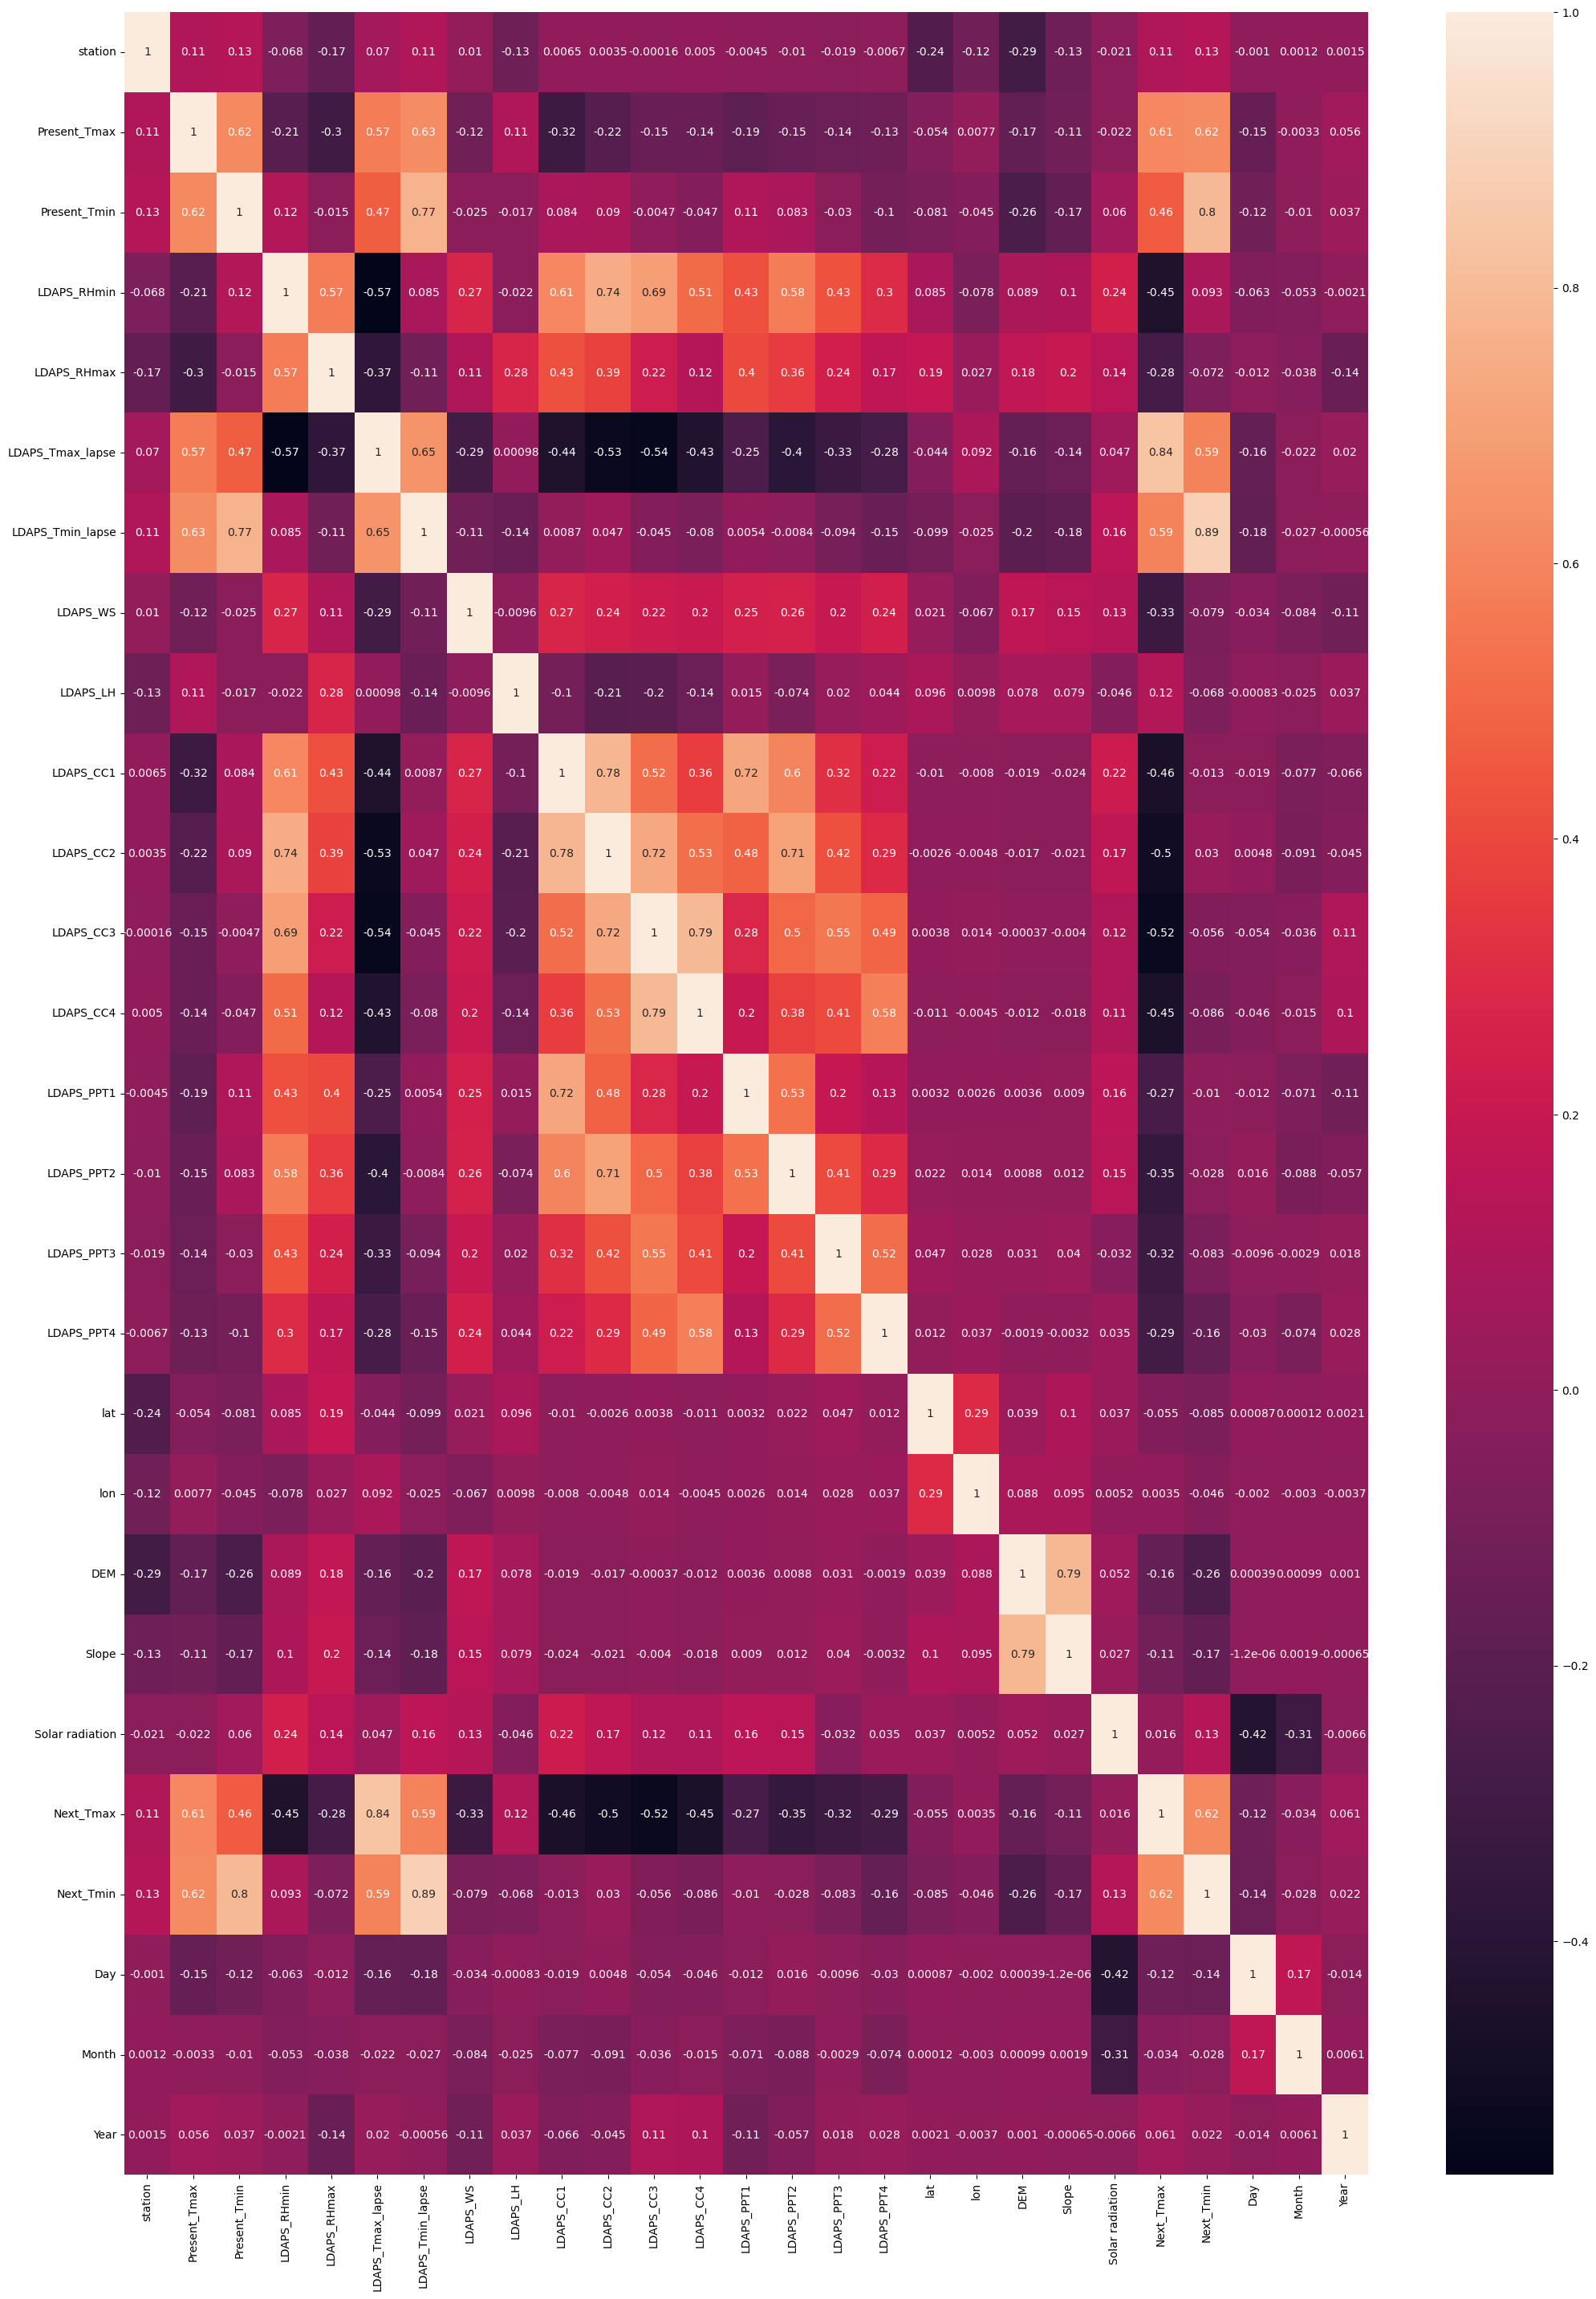

In [82]:
plt.figure(figsize=(25,35))

sns.heatmap(df.corr(),annot=True)

plt.show()

In [83]:
x = df1.drop('Next_Tmax',axis=1)
y = df1['Next_Tmax']

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['Features'] = x.columns

vif

vif          Features
0   1.232259           station
1   2.778729      Present_Tmax
2   3.401174      Present_Tmin
3   6.023431       LDAPS_RHmin
4   2.289758       LDAPS_RHmax
5   7.079419  LDAPS_Tmax_lapse
6   9.106143  LDAPS_Tmin_lapse
7   1.260453          LDAPS_WS
8   1.563240          LDAPS_LH
9   3.554295         LDAPS_CC1
10  4.764746         LDAPS_CC2
11  4.982426         LDAPS_CC3
12  2.735282         LDAPS_CC4
13  1.562737        LDAPS_PPT1
14  1.420895        LDAPS_PPT2
15  1.259088        LDAPS_PPT3
16  1.290968        LDAPS_PPT4
17  1.229273               lat
18  1.176349               lon
19  3.335398               DEM
20  3.048999             Slope
21  1.512217   Solar radiation
22  5.723829         Next_Tmin
23  1.279568               Day
24  1.131792             Month
25  1.148457              Year

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

In [88]:
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.30, random_state=i)
    ln=LinearRegression()
    ln.fit(X_train,Y_train)
    y_pred=ln.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.8062787089566936 on Random_state 355


In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=355)

In [91]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = lr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.7770988361105369
Accuracy_test 0.8062787089566936
MAE 0.9800478212894621
MSE 1.6583940607099896
RMSE 1.2877864965552286


In [92]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = gbr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.8822621972584265
Accuracy_test 0.871682950476869
MAE 0.8018899988792569
MSE 1.0984865508119013
RMSE 1.0480870912342644


In [93]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = rfr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.9851474323968225
Accuracy_test 0.9042183779778488
MAE 0.676052319842053
MSE 0.819959810463968
RMSE 0.90551632258285


In [94]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = dt.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 1.0
Accuracy_test 0.7827476255113603
MAE 0.9886969397828232
MSE 1.8598371174728527
RMSE 1.3637584527594513


In [96]:
knn = KNN()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = knn.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.6795613693127607
Accuracy_test 0.5238863558741234
MAE 1.5606120434353408
MSE 4.0758764067127355
RMSE 2.0188799881896733


In [97]:
lasso = Lasso()
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = lasso.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.7017896953979894
Accuracy_test 0.7274803826544118
MAE 1.1857383436400666
MSE 2.332964602903923
RMSE 1.5274045315187208


In [98]:
rd = Ridge()
rd.fit(x_train,y_train)
y_pred = rd.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = rd.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.7770965971406039
Accuracy_test 0.8062783067706523
MAE 0.9801078486284603
MSE 1.6583975037127636
RMSE 1.2877878333455257


In [99]:
svr = SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = svr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.0325625570007948
Accuracy_test 0.03734914963540381
MAE 2.331270917540762
MSE 8.240986027835113
RMSE 2.870711763280165


In [100]:
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
y_pred = et.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = et.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 1.0
Accuracy_test 0.9303234293042373
MAE 0.5892709772951632
MSE 0.5964817309970387
RMSE 0.772322297358453


In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
score = cross_val_score(lr,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.7364867  0.68518547 0.71131758 0.74596383 0.6017423 ]
0.6961391756395116


In [103]:
score = cross_val_score(gbr,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.75112511 0.65991644 0.69731711 0.77863613 0.6371351 ]
0.7048259793962521


In [104]:
score = cross_val_score(rfr,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.73738762 0.6632491  0.68106646 0.73581073 0.62009023]
0.6875208293039508


In [105]:
score = cross_val_score(dt,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.40504271 0.42464892 0.29328428 0.4866275  0.36009956]
0.3939405935835899


In [106]:
score = cross_val_score(knn,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[ 0.39004841 -0.14550533  0.09086378  0.29623659  0.18085475]
0.16249964020021926


In [107]:
score = cross_val_score(lasso,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.65915613 0.60838988 0.65279186 0.70401054 0.65889323]
0.6566483278505594


In [108]:
score = cross_val_score(rd,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.7366156  0.68519574 0.71151558 0.74645127 0.60173928]
0.6963034930452805


In [109]:
score = cross_val_score(svr,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[-0.0463116  -0.30122902  0.03392581 -0.17271238 -0.05036437]
-0.10733831030437009


In [110]:
score = cross_val_score(et,x,y,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.74568257 0.65471722 0.71380506 0.77360923 0.60927597]
0.699418011056953


In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
grid_param = {'n_estimators':[13,15,17],
              'max_depth' : range(4,8),
              'min_samples_split':range(4,16,4),
              'learning_rate':np.arange(0.1,0.3)
              
    
}

In [113]:
gscv = GridSearchCV(GradientBoostingRegressor(),grid_param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(4, 16, 4),
                         'n_estimators': [13, 15, 17]})

In [114]:
gscv.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_samples_split': 8,
 'n_estimators': 17}

In [115]:
Model = GradientBoostingRegressor(learning_rate=0.1,max_depth=7,min_samples_split=8,n_estimators=17)

In [116]:
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print('R2_score: ',r2_score(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE :', mean_squared_error(y_test,pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test,pred)))

R2_score:  0.8398584585691337
MAE: 0.9174986630442112
MSE : 1.370927169396789
RMSE : 1.1708659912205106


In [117]:
x1 = df1.drop('Next_Tmin',axis=1)
y1 = df1['Next_Tmin']

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1_scaler = scaler.fit_transform(x1)

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x1_scaler,i) for i in range(x1_scaler.shape[1])]
vif['Features'] = x.columns

vif

vif          Features
0   1.239493           station
1   2.861136      Present_Tmax
2   3.171148      Present_Tmin
3   5.981323       LDAPS_RHmin
4   2.290089       LDAPS_RHmax
5   8.310933  LDAPS_Tmax_lapse
6   7.126962  LDAPS_Tmin_lapse
7   1.276838          LDAPS_WS
8   1.595128          LDAPS_LH
9   3.572555         LDAPS_CC1
10  4.769794         LDAPS_CC2
11  4.999596         LDAPS_CC3
12  2.797996         LDAPS_CC4
13  1.561518        LDAPS_PPT1
14  1.419502        LDAPS_PPT2
15  1.257661        LDAPS_PPT3
16  1.283579        LDAPS_PPT4
17  1.228450               lat
18  1.182984               lon
19  3.163421               DEM
20  2.972637             Slope
21  1.512368   Solar radiation
22  4.248515         Next_Tmin
23  1.270439               Day
24  1.135458             Month
25  1.151344              Year

In [120]:
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train,X_test,Y_train,Y_test = train_test_split(x1,y1,test_size = 0.30, random_state=i)
    ln=LinearRegression()
    ln.fit(X_train,Y_train)
    y_pred=ln.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.8609446527370596 on Random_state 134


In [121]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30, random_state=134)

In [122]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = lr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.831049163830552
Accuracy_test 0.8609446527370596
MAE 0.7424876213713669
MSE 0.8561765552748771
RMSE 0.9252980899552733


In [123]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = gbr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.9109207882897957
Accuracy_test 0.9065209478543068
MAE 0.592689386596299
MSE 0.5755591167962956
RMSE 0.7586561255247963


In [124]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = rfr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.9852797771733984
Accuracy_test 0.9073891979533921
MAE 0.5750266535044426
MSE 0.5702132211253708
RMSE 0.7551246394638244


In [125]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = dt.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 1.0
Accuracy_test 0.7775124000729535
MAE 0.8544422507403752
MSE 1.3698766041461006
RMSE 1.1704172777886102


In [127]:
knn = KNN()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = knn.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.6698350751571797
Accuracy_test 0.49749219089007335
MAE 1.3547778874629812
MSE 3.093986771964462
RMSE 1.7589732152493005


In [128]:
lasso = Lasso()
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = lasso.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.768586745616807
Accuracy_test 0.7905137361331758
MAE 0.9135049092049063
MSE 1.2898261829209203
RMSE 1.1357051478799065


In [129]:
rd = Ridge()
rd.fit(x_train,y_train)
y_pred = rd.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = rd.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.8310478344377528
Accuracy_test 0.8609616357141654
MAE 0.7423580624107192
MSE 0.8560719895237356
RMSE 0.9252415844111934


In [130]:
svr = SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = svr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 0.10125043048418647
Accuracy_test 0.0920260250618038
MAE 1.8940604202044002
MSE 5.590479226029756
RMSE 2.3644194268424026


In [131]:
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
y_pred = et.predict(x_train)
accuracy  = metrics.r2_score(y_train,y_pred)
print('Accuracy', accuracy)
y_test_pred = et.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_test_pred)
print('Accuracy_test',accuracy_test)
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy 1.0
Accuracy_test 0.9231115666997698
MAE 0.5224792694965451
MSE 0.4734091515301086
RMSE 0.6880473468665573


In [133]:
score = cross_val_score(lr,x1,y1,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.73909375 0.67278175 0.80385217 0.87409384 0.86837976]
0.791640256387517


In [134]:
score = cross_val_score(rfr,x1,y1,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.71686423 0.70608931 0.81230362 0.87374255 0.85007508]
0.7918149589528138


In [135]:
score = cross_val_score(gbr,x1,y1,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.74141409 0.68748058 0.82272967 0.87867327 0.88236867]
0.8025332582947996


In [136]:
score = cross_val_score(dt,x1,y1,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.46673264 0.45057776 0.58205548 0.76737064 0.67817757]
0.5889828171218825


In [137]:
score = cross_val_score(knn,x1,y1,cv=5,scoring ='r2')
print(score)
print(score.mean())

[-0.02206156 -0.45422819  0.14158853  0.27752867  0.34684018]
0.05793352479636273


In [138]:
score = cross_val_score(lasso,x1,y1,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.70619708 0.64671171 0.75446532 0.76039277 0.82022693]
0.7375987611721442


In [139]:
score = cross_val_score(rd,x1,y1,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.7391681  0.67283013 0.80401318 0.87412457 0.86848022]
0.791723239904168


In [140]:
score = cross_val_score(svr,x1,y1,cv=5,scoring ='r2')
print(score)
print(score.mean())

[-0.07260555 -0.43455459 -0.00929773 -0.00185248  0.10921168]
-0.08181973346740701


In [141]:
score = cross_val_score(et,x1,y1,cv=5,scoring ='r2')
print(score)
print(score.mean())

[0.70292591 0.7035434  0.81739402 0.88080712 0.87225099]
0.7953842861577248


In [142]:
grid_param = {'n_estimators':[11,13,15,17,19],
              'max_depth' : range(4,8),
              'min_samples_split':range(4,16,4),
              'learning_rate':np.arange(0.1,0.3)
              
    
}

In [143]:
gscv = GridSearchCV(GradientBoostingRegressor(),grid_param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(4, 16, 4),
                         'n_estimators': [11, 13, 15, 17, 19]})

In [144]:
gscv.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_samples_split': 4,
 'n_estimators': 19}

In [145]:
Final_Model = GradientBoostingRegressor(learning_rate=0.1,max_depth=7,min_samples_split=4,n_estimators=19)

In [146]:
Final_Model.fit(x_train,y_train)
pred = Final_Model.predict(x_test)
print('R2_score: ',r2_score(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE :', mean_squared_error(y_test,pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test,pred)))

R2_score:  0.8754465430115965
MAE: 0.6948704308783927
MSE : 0.7668870838189573
RMSE : 0.8757208937892011


In [148]:
import joblib
joblib.dump(Final_Model,'Temperature_forecast.pkl')

['Temperature_forecast.pkl']